***Question 1a)***

Consider a planar pendulum where the point of support is oscillating horizontally with a displacement. Acos(γt). Here, A is the amplitude of oscillation and γ is the frequency. Write down the Lagrangian for this system. 

Derive the equation of motion for θ. Consider the small angle approximation (θ ≪ 1) and show that the equation of motion becomes a driven harmonic oscillator. Solve this equation. What is the resonance frequency?


![Alt text](image.png)

***Question 1 b)***

Consider a planar pendulum where the point of support is oscillating vertically, again with a displacement A cos γt. Write down the Lagrangian for this system. Derive the equation of motion for θ. Show that
the equation of motion has the same form as for an ordinary pendulum, but with an ”effective gravitational
field” having an oscillating part. (You are not asked to solve this equation.)


![Alt text](image-1.png)

In [54]:
import matplotlib.pyplot as plt
import numpy as np
    
#Constants
L = 1.00  #Length of rod (m)
m = 1.00  #Mass (kg)
g = 9.81  #Acceleration of gravity (m/s^2)
w0 = np.sqrt(g/L) #Harmonic frequency (1/s)
T0 = 2*np.pi/w0 #Oscillation period (s)
N = 10000 #Number of timesteps
dt = (T0/N)*3  #Timestep (s)
A = 0.05*L # Amplitude

def solveODE(gamma, horizontal, theta0):
    #Initialize arrays
    theta = np.zeros(N)
    v = np.zeros(N)
    F = np.zeros(N)
    t = np.zeros(N)
    kinetic = np.zeros(N)
    potential = np.zeros(N)
    
    #Initial conditions
    theta[0] = theta0 #Initial angle (rad)
    v[0] = 0.0 #Initial angular velocity (rad/s)
    t[0] = 0.0 #Initial time (s)
    kinetic[0] = 0.5*m*(L*v[0])**2
    potential[0] = m*g*L*(1-np.cos(theta[0]))
    
    for i in range(0, N-1, 1):
        if horizontal == True:
            F[i] = - w0**2 * np.sin(theta[i]) + ((A*gamma**2/L) * np.cos(gamma*t[i]) * np.cos(theta[i]))
        else:
            F[i] = - w0**2*np.sin(theta[i]) + ((A*gamma**2/L) * np.cos(gamma*(t[i]+dt)) * np.sin(theta[i]))
        
        v2 = v[i] + F[i]*dt/2
        
        theta[i+1] = theta[i] + v2*dt
        
        if horizontal == True:
            F[i+1] = - w0**2*np.sin(theta[i+1]) + ((A*gamma**2/L) * np.cos(gamma*(t[i]+dt)) * np.cos(theta[i+1]))
        else:
            F[i+1] = - w0**2*np.sin(theta[i+1]) + ((A*gamma**2/L) * np.cos(gamma*(t[i]+dt)) * np.sin(theta[i+1]))
        
        v[i+1] = v2 + F[i+1]*dt/2
        
        t[i+1] = t[i] + dt
        
        kinetic[i+1]=0.5*m*(L*v[i+1])**2
        
        potential[i+1]=m*g*L*(1-np.cos(theta[i+1]))
        
    return theta, t, v, potential, kinetic

***Part 3. Resonance dynamics***

The dynamics of driven pendulums may in general depend strongly both on the driving frequency γ and the driving amplitude A.

Characterize the resonance phenomena of the horizontally driven oscillator (Eq. 1) by studying the dynamics of the pendulum as a function of the driving frequency and amplitude. The resonance can be identified by plotting the oscillation amplitude of θ and also the average total energy E as a function of γ. For small angles, you can compare your simulation results with the analytical solution valid for θ ≪ 1 (Question 1a).

Characterize the resonance phenomena of the vertically driven oscillator in the same way. Notice that the resonance frequency is different from that of a horizontally driven pendulum. Hint: If θ(0) = 0 and θ'(0) = 0 there is no resonance, since θ''(0) = 0, as can be seen from Eq. 2. You must therefore give θ(0) a small initial value, for example θ(0) = 0.001.

Write a short text to summarize your simulation results

In [55]:
gamma = [10,50,100,200]

# horizontal kapitza
plt.figure('Horizontal Kapitza Angle',figsize=(10,6), dpi=1200)
for i in gamma:
    theta, t, v, potential, kinetic = solveODE(i, True, 0.001)
    plt.plot(t, theta, label=rf"$\gamma = {i}$")

plt.title('Angle',fontsize=20)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Angle (rad)',fontsize=20)
plt.legend()
plt.grid()
plt.show()

***Part 4. Unexpected equilibrium positions***

When the driving frequency and driving amplitude are both large, the driven pendulums can exhibit very non-intuitive dynamics.
Perform simulations with different initial angles in the range 0 ≤ θ ≤ π. Plot the corresponding θ(t) for different values of γ, including very high frequencies (for example up to 200ω0), both for a horizontally and a vertically driven pendulum. The pendulum can in some cases perform small and rapid oscillations around a non-zero ”equilibrium” angle, θ ̸= 0. 

Try to estimate for which values of γ and A these equilibrium positions occur. Hint: 
It can be helpful to plot the trajectories of the mass
in each case, i.e., (x, y) with time t as a parameter.

<Figure size 12000x7200 with 0 Axes>

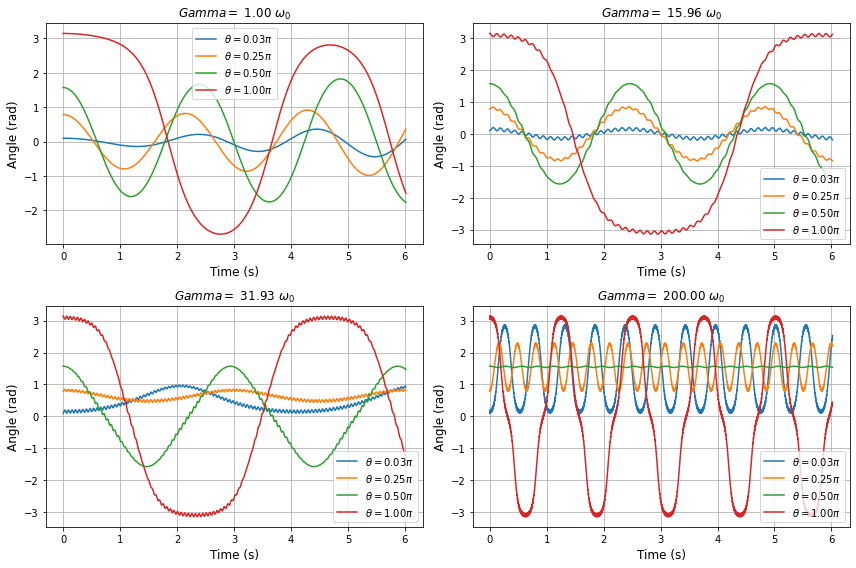

In [65]:
plt.figure('Horizontal Different Initial Angles',figsize=(10,6), dpi=1200)
init_angles = [0.1, np.pi/4, np.pi/2, np.pi]
gamma = [w0,50,100,200*w0]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, gamma in enumerate(gamma):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    for angle in init_angles:
        theta, t, v, potential, kinetic = solveODE(gamma, True, angle)
        ax.plot(t, theta, label=rf"$\theta = {angle/np.pi:.2f} \pi $")

    ax.set_title(rf'$Gamma =$ {gamma/w0:.2f} $\omega_0$')
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Angle (rad)', fontsize=12)
    ax.legend()
    ax.grid()

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

We see that the oscillation is starting to become like a square wave for higher frequencies and also bigger angles.